<a href="https://colab.research.google.com/github/DewaMS/Dewasrepo/blob/main/studentscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Relevant Library**

---



In [ ]:
#Standard libraries for data analysis:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

import joblib
import pickle

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import time

# **Import Dataset**

---



In [ ]:
url = ('https://raw.githubusercontent.com/ASatya-J107/DigitalSkolaDSProject/main/Dataset/Expanded_data_with_more_features.csv')
dataset = pd.read_csv(url)

In [ ]:
dataset

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0           none             married     regularly          yes         3.0   
1            NaN             married     sometimes          yes         0.0   
2           none              single     sometimes          yes         4.0   
3           none             married         never           no         1.0   
4           none             married     sometimes          yes         0.0   
...          ...                 ...           ...          ...         ...   
30636       none              single     sometimes           no         2.0   
30637       none              single     regularly           no         1.0   
30638  completed             married     sometimes           no         1.0   
30639  completed             married     regularly           no         3.0   
30640       none             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1                NaN         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3                NaN         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[30641 rows x 15 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
dataset.head()

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

# **Data Cleansing**

---





In [ ]:
#drop the first column
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
dataset

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1                NaN         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3                NaN         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[30641 rows x 14 columns]

In [ ]:
dt=dataset

In [ ]:
#check the duplicated data
duplicate_row = dt[dt.duplicated()]
print("Jumlah baris terduplikasi: ", duplicate_row.shape)

Jumlah baris terduplikasi:  (0, 14)


In [ ]:
#cek the uniqueness
for column in dt.columns:
    num_distinct_values = len(dt[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Gender: 2 distinct values
EthnicGroup: 6 distinct values
ParentEduc: 7 distinct values
LunchType: 2 distinct values
TestPrep: 3 distinct values
ParentMaritalStatus: 5 distinct values
PracticeSport: 4 distinct values
IsFirstChild: 3 distinct values
NrSiblings: 9 distinct values
TransportMeans: 3 distinct values
WklyStudyHours: 4 distinct values
MathScore: 95 distinct values
ReadingScore: 90 distinct values
WritingScore: 93 distinct values


In [ ]:
# Mapping the Studyhours
study_mapping = {
    '< 5': 'Less than 5 hours',
    '5 - 10': 'Between 5-10 hours',
    '> 10': 'More than 10 hours'
}

# Clean Non Alphanumeric Values from ParentEduc
dt['ParentEduc']=dt['ParentEduc'].str.replace("'", "")

In [ ]:
#checking the dataset
dt

Gender EthnicGroup         ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelors degree      standard       none   
1      female     group C       some college      standard        NaN   
2      female     group B     masters degree      standard       none   
3        male     group A  associates degree  free/reduced       none   
4        male     group C       some college      standard       none   
...       ...         ...                ...           ...        ...   
30636  female     group D        high school      standard       none   
30637    male     group E        high school      standard       none   
30638  female         NaN        high school  free/reduced  completed   
30639  female     group D  associates degree      standard  completed   
30640    male     group B       some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1                NaN         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3                NaN         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[30641 rows x 14 columns]

# **Handling the missing values**

---



In [ ]:
# Checking the missing values
print(dt.isnull().sum())

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [ ]:
# Interpolate for numericial value
dt['NrSiblings'] = dt['NrSiblings'].interpolate()

# Use Mode for categoricial columns
dt['EthnicGroup'] = dt['EthnicGroup'].fillna(dt['EthnicGroup'].mode()[0])
dt['WklyStudyHours'] = dt['WklyStudyHours'].fillna(dt['WklyStudyHours'].mode()[0])
dt['ParentEduc'] = dt['ParentEduc'].fillna(dt['ParentEduc'].mode()[0])
dt['ParentMaritalStatus'] = dt['ParentMaritalStatus'].fillna(dt['ParentMaritalStatus'].mode()[0])

# Use Mode for binary columns
dt['IsFirstChild'] = dt['IsFirstChild'].fillna(dt['IsFirstChild'].mode()[0])
dt['PracticeSport'] = dt['PracticeSport'].fillna(dt['PracticeSport'].mode()[0])
dt['TestPrep'] = dt['TestPrep'].fillna(dt['TestPrep'].mode()[0])
dt['TransportMeans'] = dt['TransportMeans'].fillna(dt['TransportMeans'].mode()[0])

In [ ]:
#recheck the missing values
print(dt.isnull().sum())

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


all missing values has been handled

In [ ]:
#check the data set summary
dt.describe().style.format("{:.2f}")

# **Exploratory Data Analysis**

---



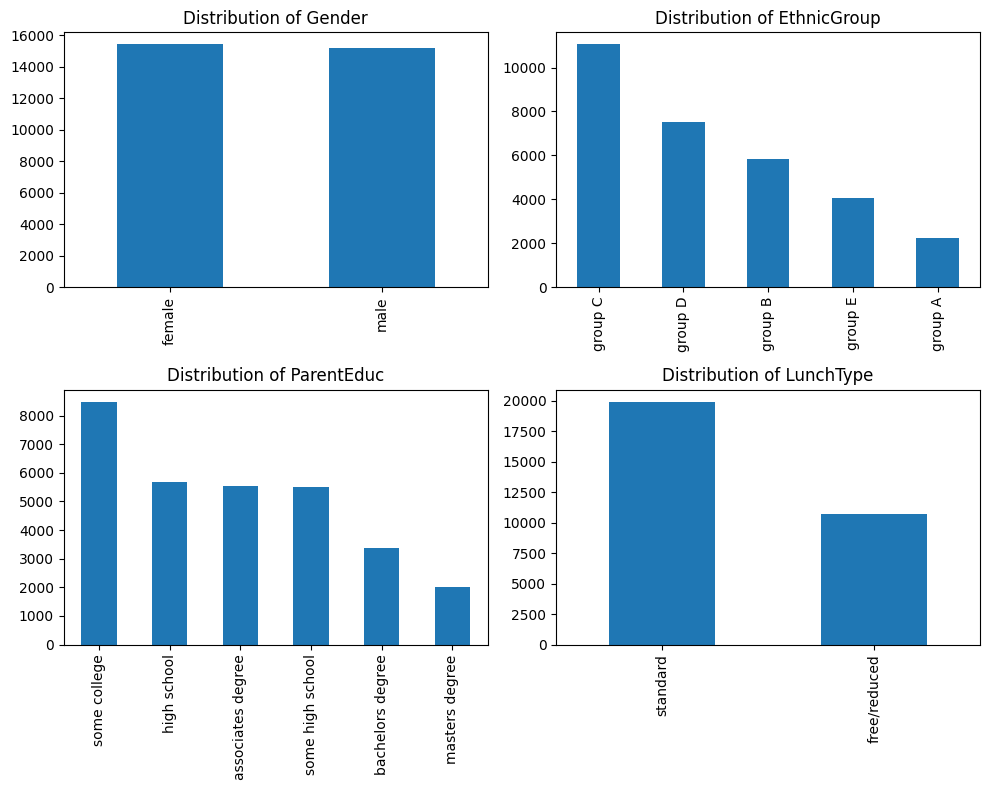

In [ ]:
# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over the columns and create the distribution plots
columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType']
for i, col in enumerate(columns):
    ax = axs[i//2, i%2]
    dataset[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

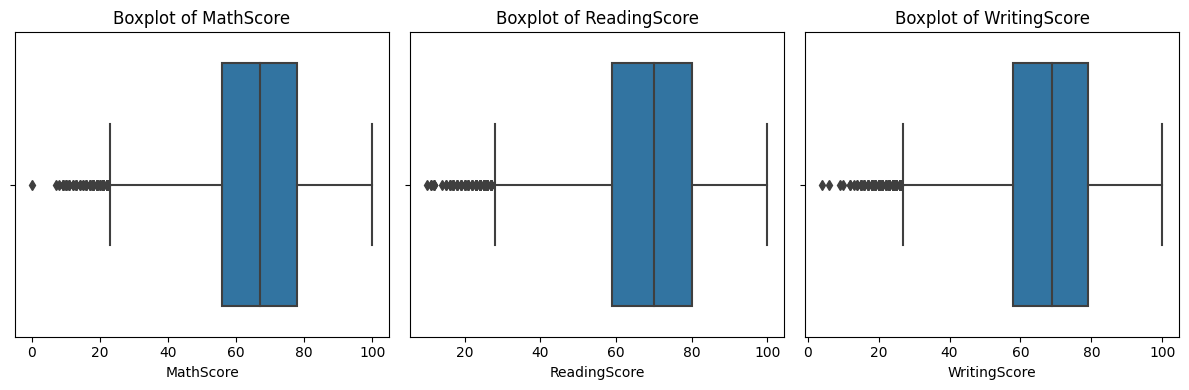

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

columns = ['MathScore', 'ReadingScore', 'WritingScore']
for i, col in enumerate(columns):
    ax = axs[i]
    sns.boxplot(x=dataset[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()

plt.show()

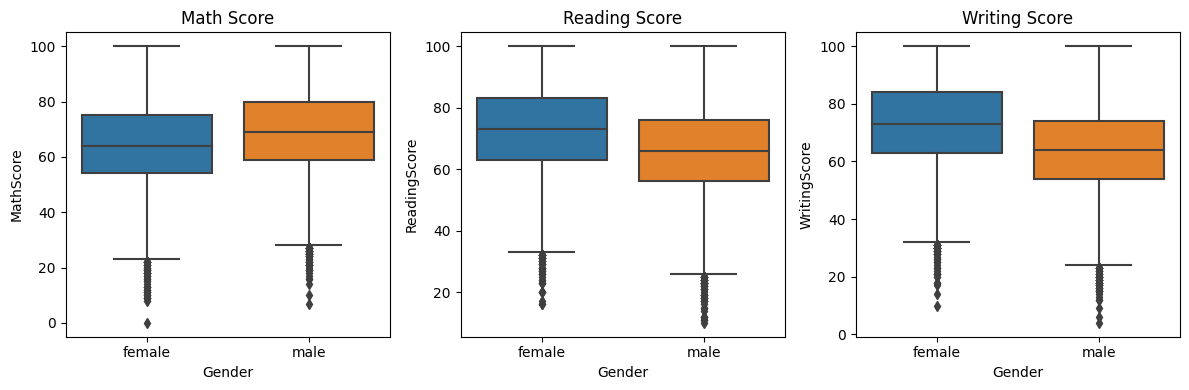

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(ax=axs[0], x='Gender', y='MathScore', data=dataset)
axs[0].set_title('Math Score')

sns.boxplot(ax=axs[1], x='Gender', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')

sns.boxplot(ax=axs[2], x='Gender', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')

plt.tight_layout()

plt.show()

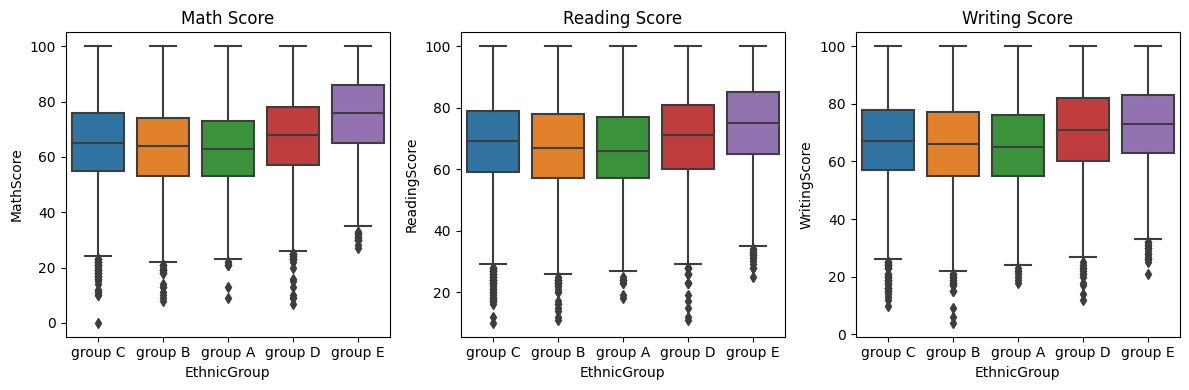

In [ ]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by EthnicGroup
sns.boxplot(ax=axs[0], x='EthnicGroup', y='MathScore', data=dataset)
axs[0].set_title('Math Score')

# Box plot of ReadingScore by EthnicGroup
sns.boxplot(ax=axs[1], x='EthnicGroup', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')

# Box plot of WritingScore by EthnicGroup
sns.boxplot(ax=axs[2], x='EthnicGroup', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

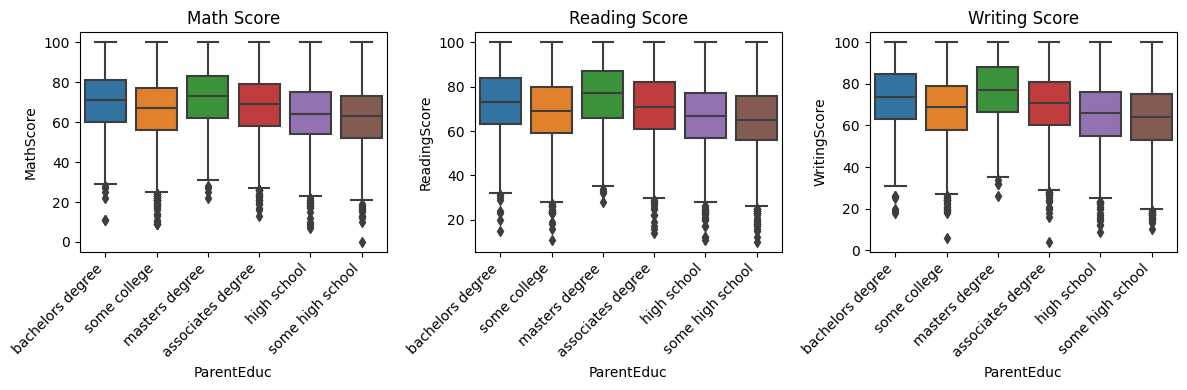

In [ ]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by ParentEduc
sns.boxplot(ax=axs[0], x='ParentEduc', y='MathScore', data=dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by ParentEduc
sns.boxplot(ax=axs[1], x='ParentEduc', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by ParentEduc
sns.boxplot(ax=axs[2], x='ParentEduc', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

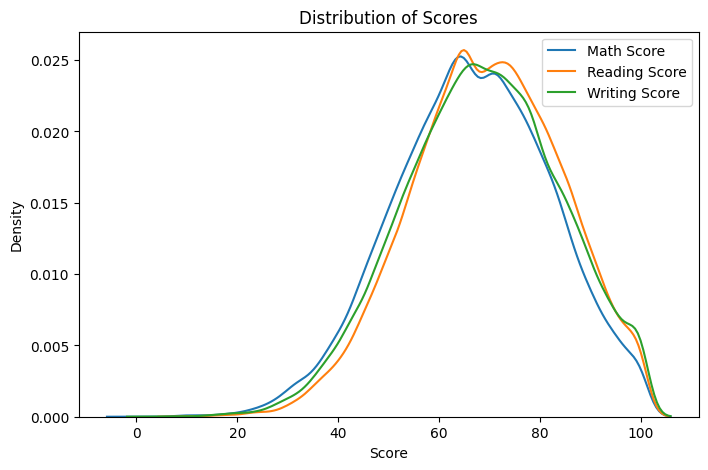

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Distribution plot of MathScore
sns.distplot(dataset['MathScore'], hist=False, kde=True, label='Math Score')

# Distribution plot of ReadingScore
sns.distplot(dataset['ReadingScore'], hist=False, kde=True, label='Reading Score')

# Distribution plot of WritingScore
sns.distplot(dataset['WritingScore'], hist=False, kde=True, label='Writing Score')

# Set axis labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.set_title('Distribution of Scores')

# Add a legend
ax.legend()

# Display the combined distribution plot
plt.show()


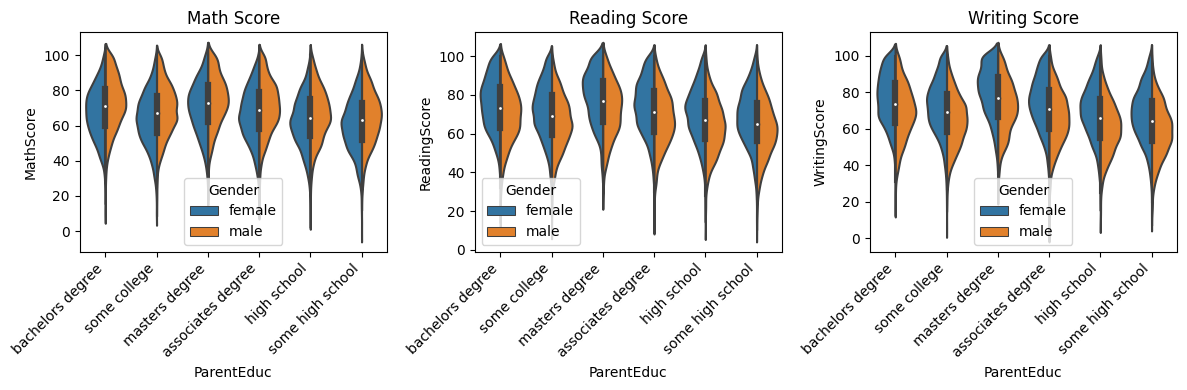

In [ ]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Violin plot of MathScore by ParentEduc and Gender
sns.violinplot(ax=axs[0], x='ParentEduc', y='MathScore', hue='Gender', split=True, data=dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Violin plot of ReadingScore by ParentEduc and Gender
sns.violinplot(ax=axs[1], x='ParentEduc', y='ReadingScore', hue='Gender', split=True, data=dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Violin plot of WritingScore by ParentEduc and Gender
sns.violinplot(ax=axs[2], x='ParentEduc', y='WritingScore', hue='Gender', split=True, data=dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()


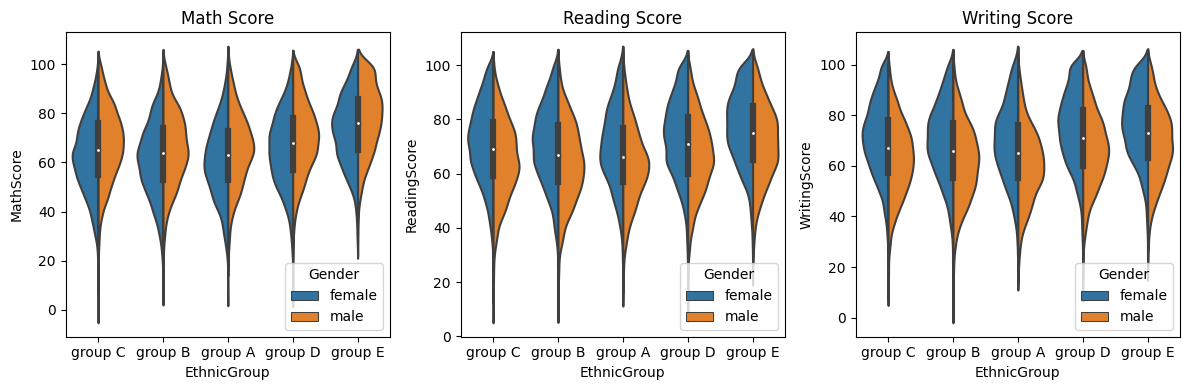

In [ ]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Violin plot of MathScore by EthnicGroup and Gender
sns.violinplot(ax=axs[0], x='EthnicGroup', y='MathScore', hue='Gender', split=True, data=dataset)
axs[0].set_title('Math Score')

# Violin plot of ReadingScore by EthnicGroup and Gender
sns.violinplot(ax=axs[1], x='EthnicGroup', y='ReadingScore', hue='Gender', split=True, data=dataset)
axs[1].set_title('Reading Score')

# Violin plot of WritingScore by EthnicGroup and Gender
sns.violinplot(ax=axs[2], x='EthnicGroup', y='WritingScore', hue='Gender', split=True, data=dataset)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

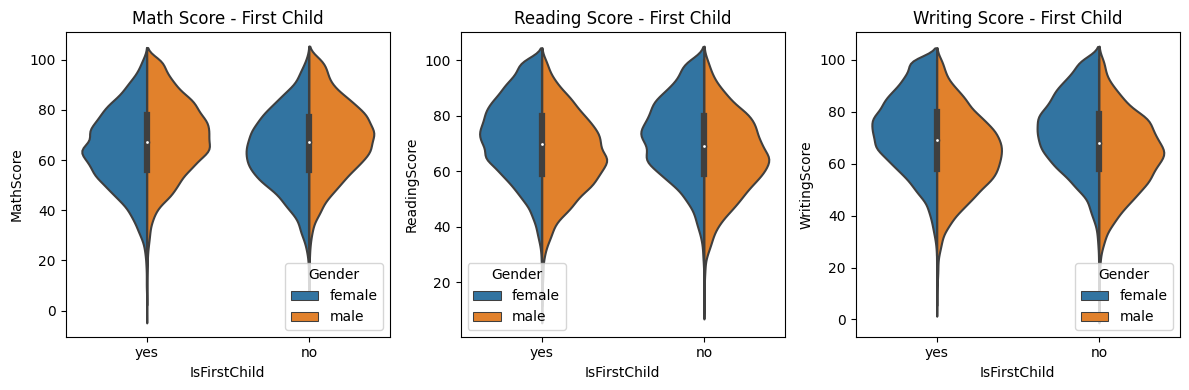

In [ ]:
# Create a figure and three subplots for First Child vs Non-First Child
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4))

# Violin plot of MathScore by IsFirstChild and Gender
sns.violinplot(ax=axs2[0], x='IsFirstChild', y='MathScore', hue='Gender', data=dataset, split=True)
axs2[0].set_title('Math Score - First Child')

# Violin plot of ReadingScore by IsFirstChild and Gender
sns.violinplot(ax=axs2[1], x='IsFirstChild', y='ReadingScore', hue='Gender', data=dataset, split=True)
axs2[1].set_title('Reading Score - First Child')

# Violin plot of WritingScore by IsFirstChild and Gender
sns.violinplot(ax=axs2[2], x='IsFirstChild', y='WritingScore', hue='Gender', data=dataset, split=True)
axs2[2].set_title('Writing Score - First Child')

# Adjust the spacing between subplots for First Child vs Non-First Child
plt.tight_layout()

# Display the merged graph
plt.show()


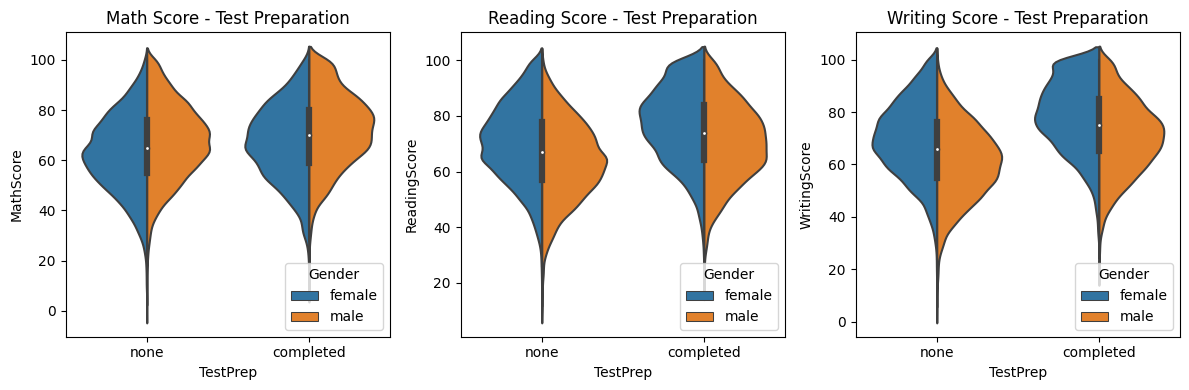

In [ ]:
# Create a figure and three subplots for TestPrep vs Non-TestPrep
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4))

# Violin plot of MathScore by TestPrep and Gender
sns.violinplot(ax=axs2[0], x='TestPrep', y='MathScore', hue='Gender', data=dataset, split=True)
axs2[0].set_title('Math Score - Test Preparation')

# Violin plot of ReadingScore by TestPrep and Gender
sns.violinplot(ax=axs2[1], x='TestPrep', y='ReadingScore', hue='Gender', data=dataset, split=True)
axs2[1].set_title('Reading Score - Test Preparation')

# Violin plot of WritingScore by TestPrep and Gender
sns.violinplot(ax=axs2[2], x='TestPrep', y='WritingScore', hue='Gender', data=dataset, split=True)
axs2[2].set_title('Writing Score - Test Preparation')

# Adjust the spacing between subplots for TestPrep vs Non-TestPrep
plt.tight_layout()

# Display the merged graph
plt.show()

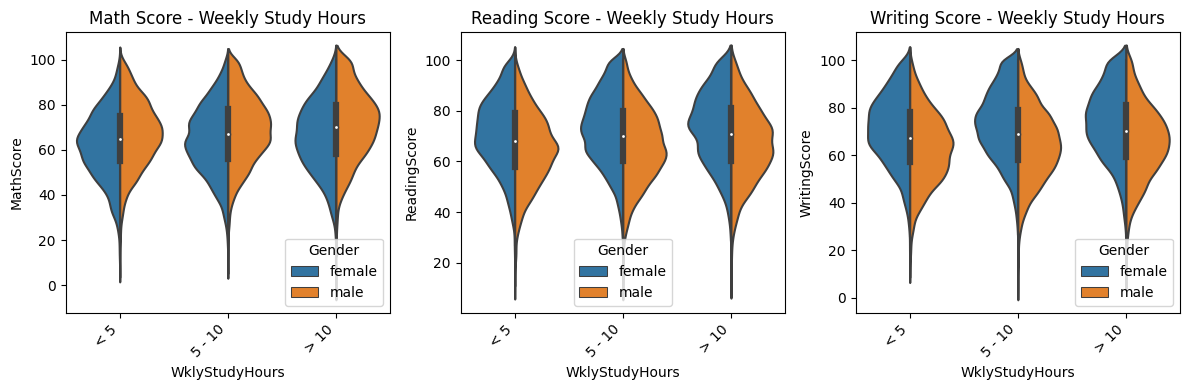

In [ ]:
# Create a figure and three subplots for WklyStudyHours
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4))

# Violin plot of MathScore by WklyStudyHours and Gender
sns.violinplot(ax=axs2[0], x='WklyStudyHours', y='MathScore', hue='Gender', data=dataset, split=True)
axs2[0].set_title('Math Score - Weekly Study Hours')
axs2[0].set_xticklabels(axs2[0].get_xticklabels(), rotation=45, ha='right')

# Violin plot of ReadingScore by WklyStudyHours and Gender
sns.violinplot(ax=axs2[1], x='WklyStudyHours', y='ReadingScore', hue='Gender', data=dataset, split=True)
axs2[1].set_title('Reading Score - Weekly Study Hours')
axs2[1].set_xticklabels(axs2[1].get_xticklabels(), rotation=45, ha='right')

# Violin plot of WritingScore by WklyStudyHours and Gender
sns.violinplot(ax=axs2[2], x='WklyStudyHours', y='WritingScore', hue='Gender', data=dataset, split=True)
axs2[2].set_title('Writing Score - Weekly Study Hours')
axs2[2].set_xticklabels(axs2[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots for WklyStudyHours
plt.tight_layout()

# Display the merged graph
plt.show()

# **Label Encoding**

---



In [ ]:
data = dt.copy()
#cek the uniqueness
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Gender: 2 distinct values
EthnicGroup: 5 distinct values
ParentEduc: 6 distinct values
LunchType: 2 distinct values
TestPrep: 2 distinct values
ParentMaritalStatus: 4 distinct values
PracticeSport: 3 distinct values
IsFirstChild: 2 distinct values
NrSiblings: 34 distinct values
TransportMeans: 2 distinct values
WklyStudyHours: 3 distinct values
MathScore: 95 distinct values
ReadingScore: 90 distinct values
WritingScore: 93 distinct values


In [ ]:
# Mapping the Gender
gender_mapping = {
    'female': 0,
    'male': 1
}

# Mapping the LunchType
lunch_mapping = {
    'free/reduced': 0,
    'standard': 1
}

# Converting IsFirstChild to object type
data['IsFirstChild'] = dt['IsFirstChild'].astype(object)

# Mapping the IsFirstChild
value_mapping = {
    'no': 0,
    'yes': 1
}

# Mapping the TestPrep
test_mapping = {
    'none': 0,
    'completed': 1
}

# Mapping the Schoolbus
bus_mapping = {
    'private': 0,
    'school_bus': 1
}

# Fixing the values in the column
data['Gender'] = data['Gender'].map(gender_mapping)
data['LunchType'] = data['LunchType'].map(lunch_mapping)
data['IsFirstChild'] = data['IsFirstChild'].map(value_mapping)
data['TestPrep'] = data['TestPrep'].map(test_mapping)
data['TransportMeans'] = data['TransportMeans'].map(bus_mapping)

data.head()

Gender EthnicGroup         ParentEduc  LunchType  TestPrep  \
0       0     group C   bachelors degree          1         0   
1       0     group C       some college          1         0   
2       0     group B     masters degree          1         0   
3       1     group A  associates degree          0         0   
4       1     group C       some college          1         0   

  ParentMaritalStatus PracticeSport  IsFirstChild  NrSiblings  TransportMeans  \
0             married     regularly             1         3.0               1   
1             married     sometimes             1         0.0               1   
2              single     sometimes             1         4.0               1   
3             married         never             0         1.0               1   
4             married     sometimes             1         0.0               1   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

# **One Hot Encoding**

---



In [ ]:
dt.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [ ]:
categorical_cols = ['EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'PracticeSport', 'WklyStudyHours']


for col in categorical_cols:
    data = pd.get_dummies(data, columns=[col], prefix = [col], drop_first=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        30641 non-null  int64  
 1   LunchType                     30641 non-null  int64  
 2   TestPrep                      30641 non-null  int64  
 3   IsFirstChild                  30641 non-null  int64  
 4   NrSiblings                    30641 non-null  float64
 5   TransportMeans                30641 non-null  int64  
 6   MathScore                     30641 non-null  int64  
 7   ReadingScore                  30641 non-null  int64  
 8   WritingScore                  30641 non-null  int64  
 9   EthnicGroup_group A           30641 non-null  uint8  
 10  EthnicGroup_group B           30641 non-null  uint8  
 11  EthnicGroup_group C           30641 non-null  uint8  
 12  EthnicGroup_group D           30641 non-null  uint8  
 13  E

# **Correlation Matrix**

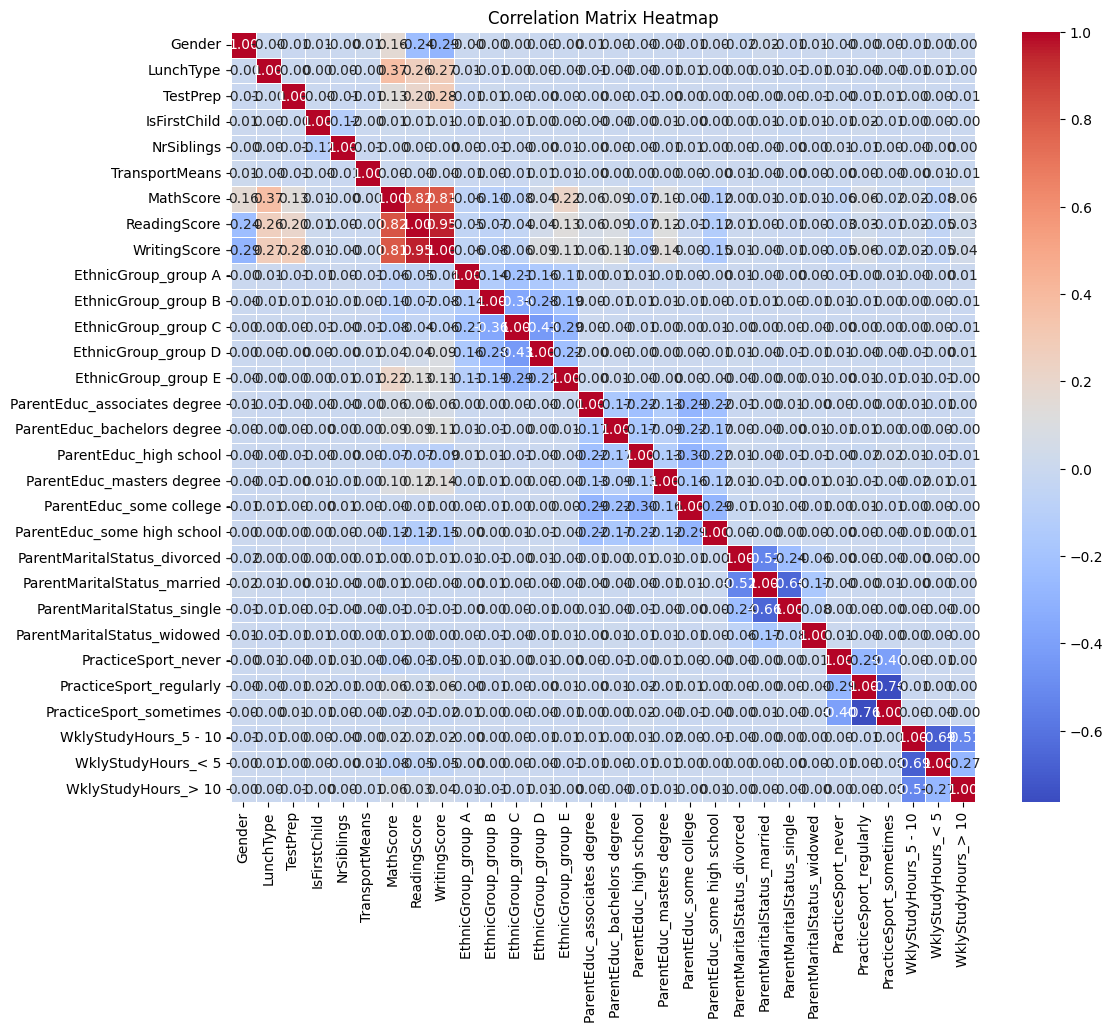

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

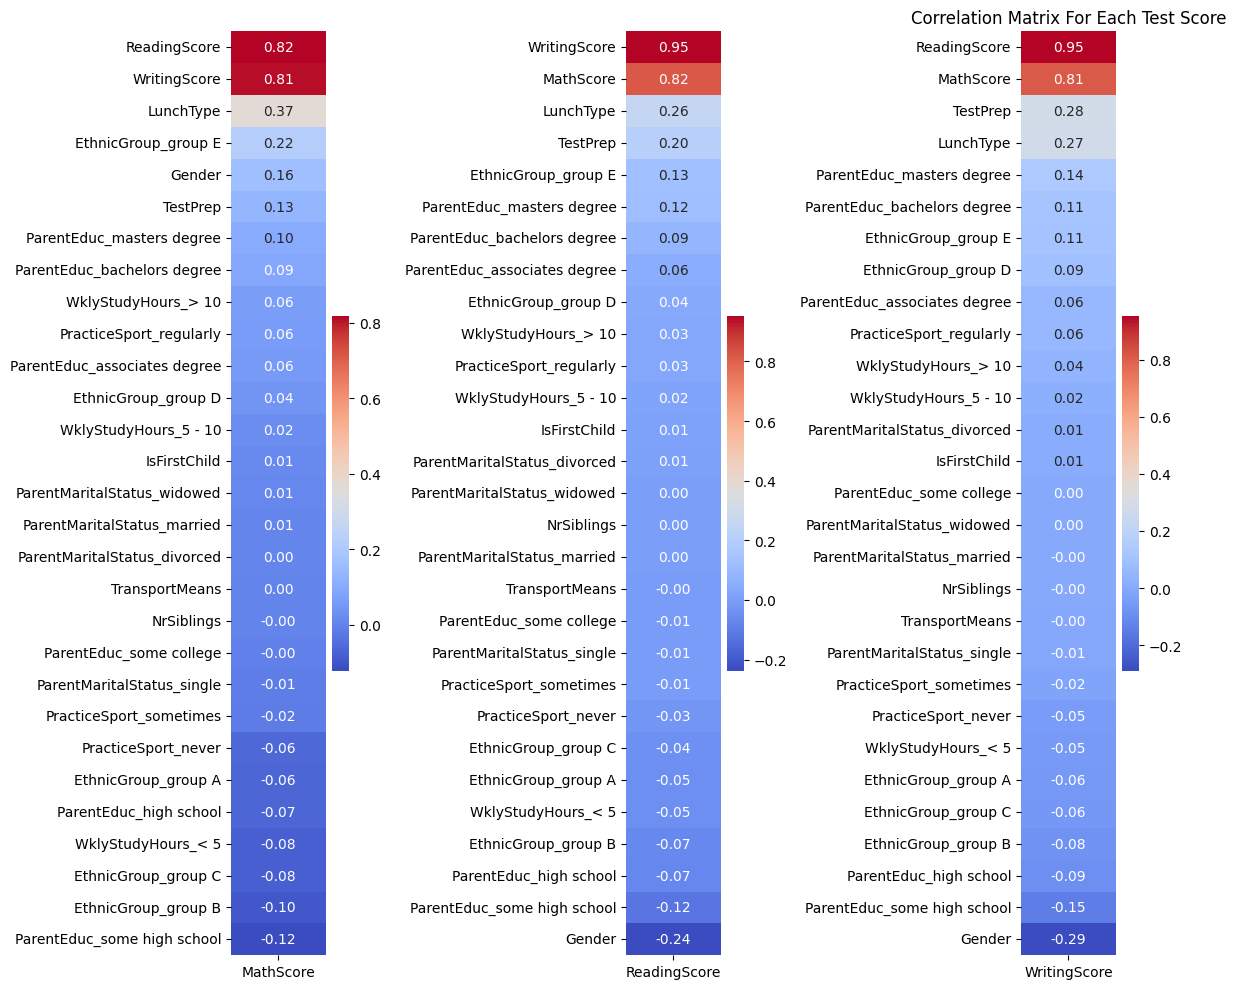

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 10))
corr = data.corr()
plt.title("Correlation Matrix For Each Test Score")
#correlation for math score
target_corr_math = corr['MathScore'].drop('MathScore')
target_corr_math_sorted = target_corr_math.sort_values(ascending=False)
sns.heatmap(target_corr_math_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', ax=axs[0])
#axs[0].title(f'Correlation with {target_corr_math.name}')

#correlation for reading score
target_corr_read = corr['ReadingScore'].drop('ReadingScore')
target_corr_read_sorted = target_corr_read.sort_values(ascending=False)
sns.heatmap(target_corr_read_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', ax=axs[1])
#axs[1].title(f'Correlation with {target_corr_read.name}')

#correlation for write score
target_corr_write = corr['WritingScore'].drop('WritingScore')
target_corr_write_sorted = target_corr_write.sort_values(ascending=False)
sns.heatmap(target_corr_write_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', ax=axs[2])
#axs[2].title(f'Correlation with {target_corr_write.name}')
plt.tight_layout()

plt.show()

# **Split the dataset into features and targets**

---



In [ ]:
#Split features from the dataset
features = data.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1)

# Create a list of one-hot encoded columns and Save the list to a pickle file
one_hot_columns = features.columns
with open('one_hot_columns.pkl', 'wb') as f:
    pickle.dump(one_hot_columns, f)

#Split targets from the dataset
target_cols = ['MathScore', 'ReadingScore', 'WritingScore']
targets = data.loc[:, target_cols]

# **Feature Standardization**

---



In [ ]:
scaler = StandardScaler()
features2 = pd.DataFrame(scaler.fit_transform(features))
features2.columns = features.columns.values
features2.index = features.index.values
features = features2
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
features.head()

Gender  LunchType  TestPrep  IsFirstChild  NrSiblings  TransportMeans  \
0 -0.993267   0.734413 -0.693717      0.730153    0.591775        0.767689   
1 -0.993267   0.734413 -0.693717      0.730153   -1.490714        0.767689   
2 -0.993267   0.734413 -0.693717      0.730153    1.285938        0.767689   
3  1.006779  -1.361632 -0.693717     -1.369576   -0.796551        0.767689   
4  1.006779   0.734413 -0.693717      0.730153   -1.490714        0.767689   

   EthnicGroup_group A  EthnicGroup_group B  EthnicGroup_group C  \
0            -0.279416            -0.484538             1.331330   
1            -0.279416            -0.484538             1.331330   
2            -0.279416             2.063820            -0.751129   
3             3.578893            -0.484538            -0.751129   
4            -0.279416            -0.484538             1.331330   

   EthnicGroup_group D  ...  ParentMaritalStatus_divorced  \
0            -0.569449  ...                     -0.437307   
1            -0.569449  ...                     -0.437307   
2            -0.569449  ...                     -0.437307   
3            -0.569449  ...                     -0.437307   
4            -0.569449  ...                     -0.437307   

   ParentMaritalStatus_married  ParentMaritalStatus_single  \
0                     0.836103                   -0.549032   
1                     0.836103                   -0.549032   
2                    -1.196025                    1.821389   
3                     0.836103                   -0.549032   
4                     0.836103                   -0.549032   

   ParentMaritalStatus_widowed  PracticeSport_never  PracticeSport_regularly  \
0                     -0.14024            -0.387708                 1.356086   
1                     -0.14024            -0.387708                -0.737416   
2                     -0.14024            -0.387708                -0.737416   
3                     -0.14024             2.579263                -0.737416   
4                     -0.14024            -0.387708                -0.737416   

   PracticeSport_sometimes  WklyStudyHours_5 - 10  WklyStudyHours_< 5  \
0                -1.034774              -1.131299            1.649082   
1                 0.966394               0.883940           -0.606398   
2                 0.966394              -1.131299            1.649082   
3                -1.034774               0.883940           -0.606398   
4                 0.966394               0.883940           -0.606398   

   WklyStudyHours_> 10  
0            -0.452205  
1            -0.452205  
2            -0.452205  
3            -0.452205  
4            -0.452205  

[5 rows x 27 columns]

In [ ]:
features.columns

Index(['Gender', 'LunchType', 'TestPrep', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'EthnicGroup_group A', 'EthnicGroup_group B',
       'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E',
       'ParentEduc_associates degree', 'ParentEduc_bachelors degree',
       'ParentEduc_high school', 'ParentEduc_masters degree',
       'ParentEduc_some college', 'ParentEduc_some high school',
       'ParentMaritalStatus_divorced', 'ParentMaritalStatus_married',
       'ParentMaritalStatus_single', 'ParentMaritalStatus_widowed',
       'PracticeSport_never', 'PracticeSport_regularly',
       'PracticeSport_sometimes', 'WklyStudyHours_5 - 10',
       'WklyStudyHours_< 5', 'WklyStudyHours_> 10'],
      dtype='object')

# **Split the dataset into training and testing sets**

In [ ]:
# Extract target columns from the DataFrame
y1 = targets["MathScore"]
y2 = targets["ReadingScore"]
y3 = targets["WritingScore"]

# Split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(features, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(features, y2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(features, y3, test_size=0.2, random_state=42)

# **Model Evaluation**

---



## **Evaluating model with Linear Regression, Elastic Net Regression, and SVR.**

---



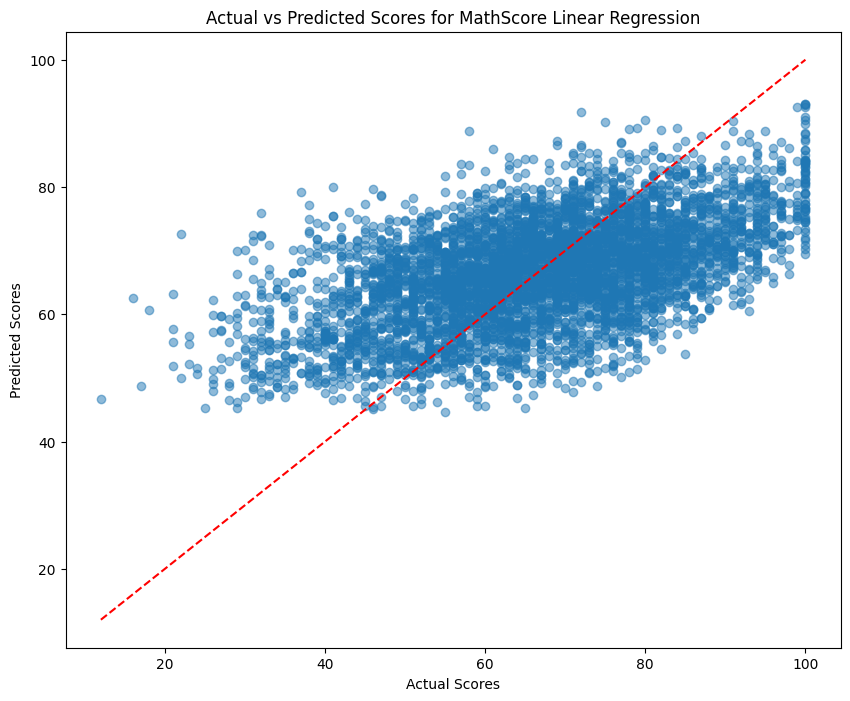

RMSE Values for MathScore Linear Regression : 12.973285357071507
MAE Values for MathScore Linear Regression : 10.49457563539629
R2 Score for MathScore Linear Regression : 0.2893787933396642
Execution Time for MathScore Linear Regression : 0.021296167373657228


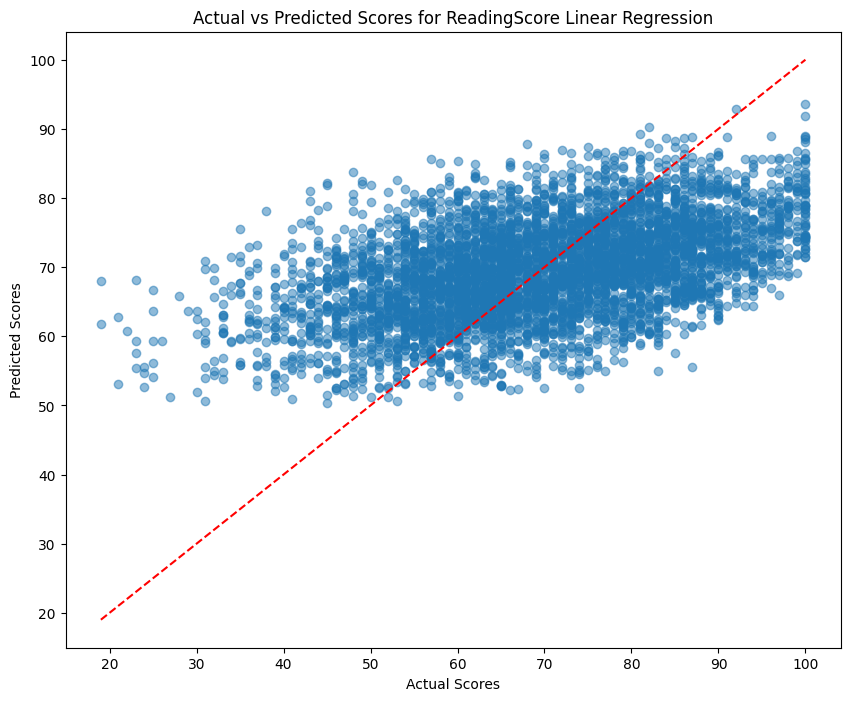

RMSE Values for ReadingScore Linear Regression : 12.983325499803176
MAE Values for ReadingScore Linear Regression : 10.531960186710867
R2 Score for ReadingScore Linear Regression : 0.2281886623146078
Execution Time for ReadingScore Linear Regression : 0.020413827896118165


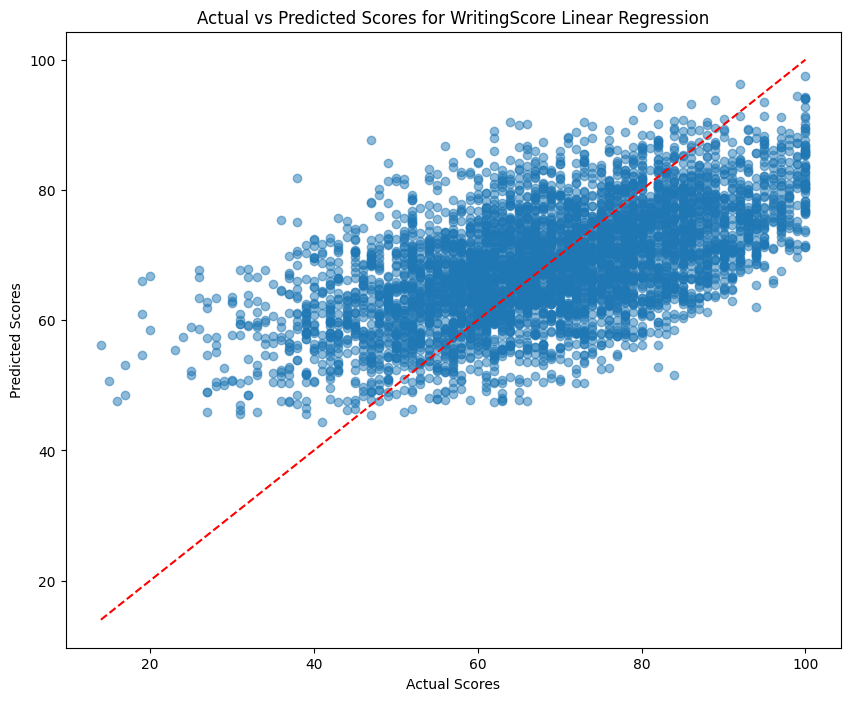

RMSE Values for WritingScore Linear Regression : 12.686426569149301
MAE Values for WritingScore Linear Regression : 10.291376772089587
R2 Score for WritingScore Linear Regression : 0.32647489450538675
Execution Time for WritingScore Linear Regression : 0.020597028732299804


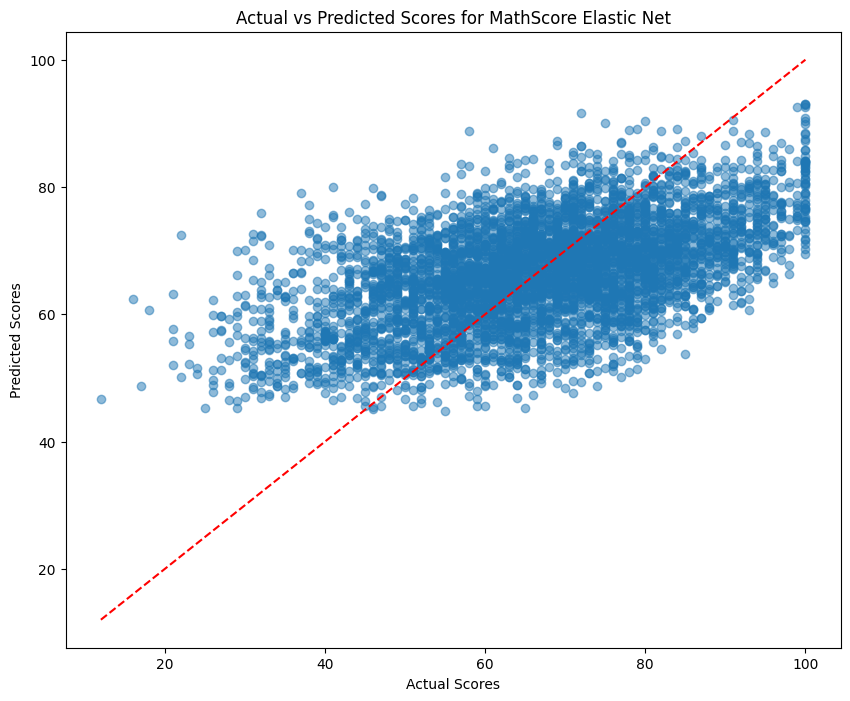

RMSE Values for MathScore Elastic Net : 12.972539400284216
MAE Values for MathScore Elastic Net : 10.495017509098142
R2 Score for MathScore Elastic Net : 0.2894627586317303
Execution Time for MathScore Elastic Net : 0.5968039512634278


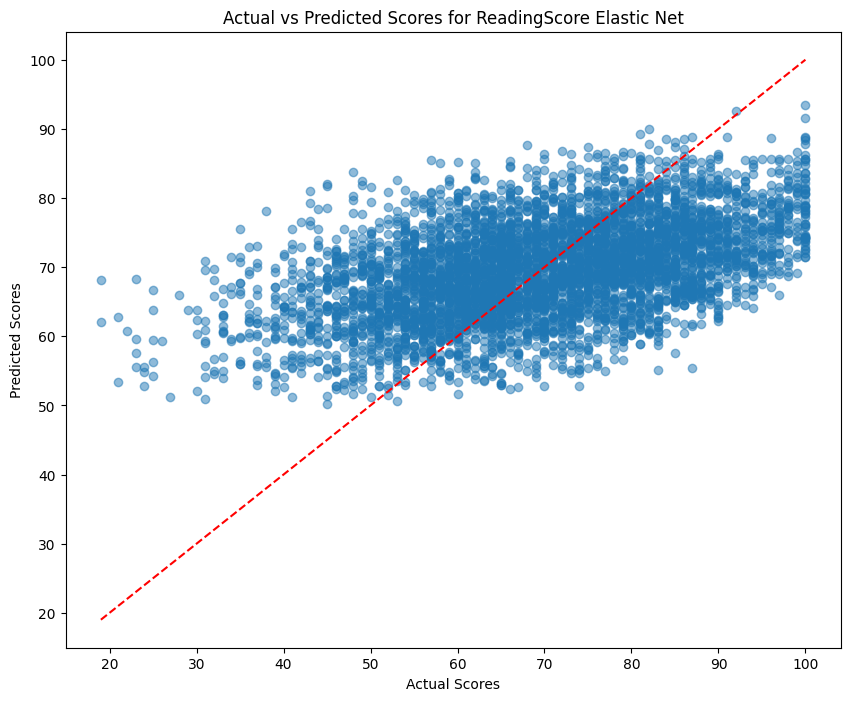

RMSE Values for ReadingScore Elastic Net : 12.983052613015147
MAE Values for ReadingScore Elastic Net : 10.532568564218542
R2 Score for ReadingScore Elastic Net : 0.2282211989649378
Execution Time for ReadingScore Elastic Net : 0.41608443260192873


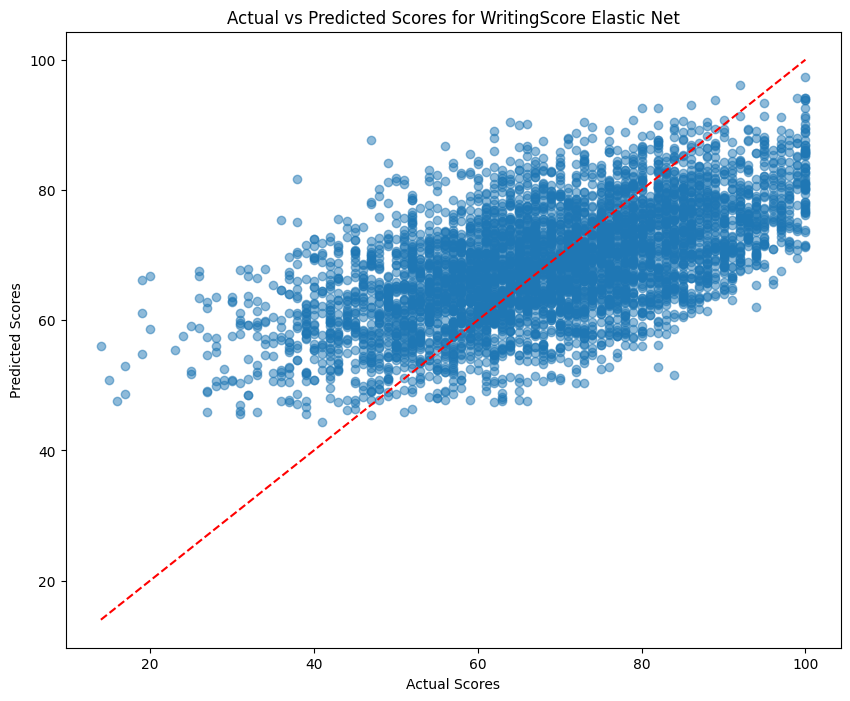

RMSE Values for WritingScore Elastic Net : 12.684921642583795
MAE Values for WritingScore Elastic Net : 10.292248079516707
R2 Score for WritingScore Elastic Net : 0.3266345556493011
Execution Time for WritingScore Elastic Net : 0.39673657417297364


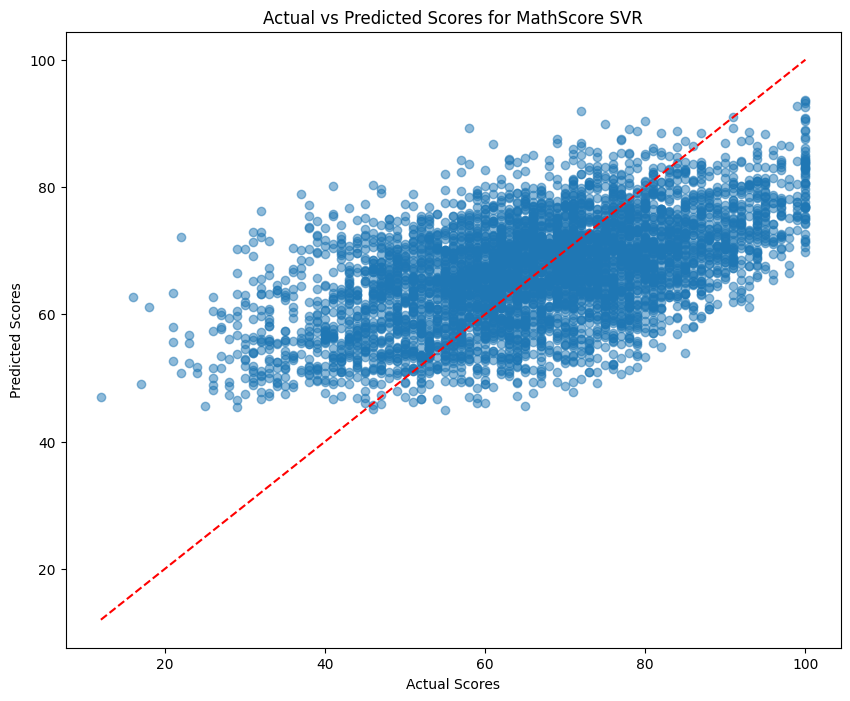

RMSE Values for MathScore SVR : 12.978918564448183
MAE Values for MathScore SVR : 10.497681648703841
R2 Score for MathScore SVR : 0.28876359647990835
Execution Time for MathScore SVR : 15.700695466995239


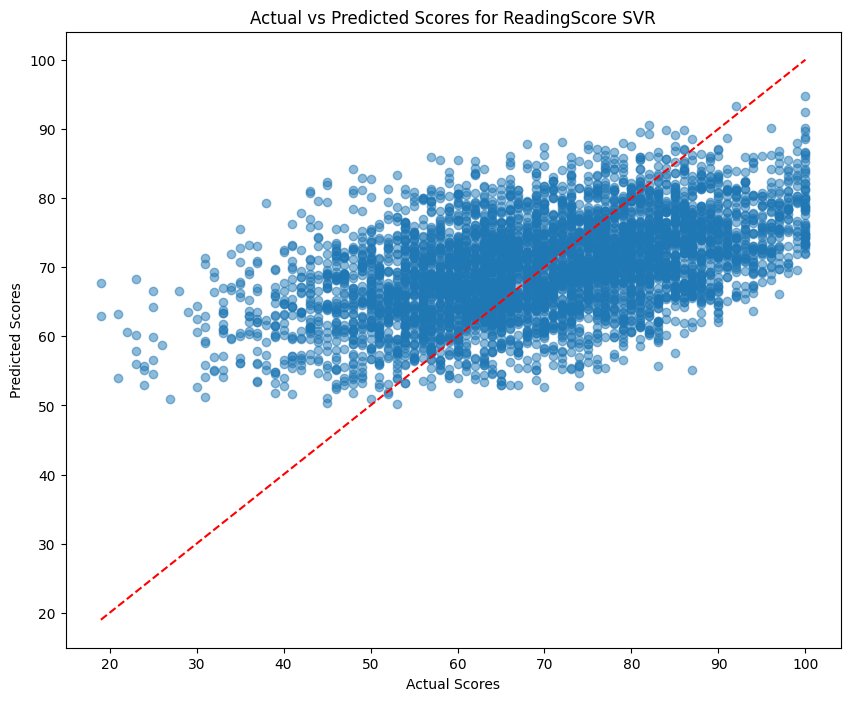

RMSE Values for ReadingScore SVR : 12.99494383178978
MAE Values for ReadingScore SVR : 10.534569394620839
R2 Score for ReadingScore SVR : 0.2268088428296023
Execution Time for ReadingScore SVR : 15.644592571258546


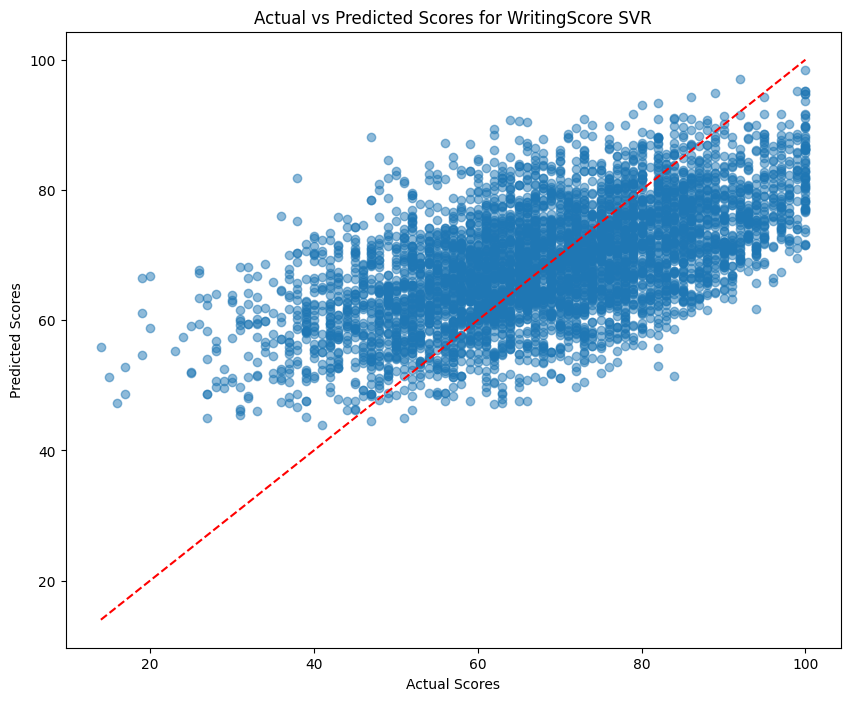

RMSE Values for WritingScore SVR : 12.696786787388557
MAE Values for WritingScore SVR : 10.292301494669491
R2 Score for WritingScore SVR : 0.32537380952199024
Execution Time for WritingScore SVR : 15.770588445663453


In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNet(alpha=0.001, l1_ratio=0.5),
    "SVR": SVR(C=0.1, kernel='linear')
}

# Create a dictionary to store evaluation results
results = {
    "Target": [],
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "R2 Score": [],
    "Execution Time" : []
}


# Perform K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    for y_train, y_test, target_name in [(y1_train, y1_test, "MathScore"), (y2_train, y2_test, "ReadingScore"), (y3_train, y3_test, "WritingScore")]:
        rmse_list, mae_list, r2_list, execution_time_list = [], [], [], []

        for train_index, test_index in kf.split(X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            start_time = time.time()
            model.fit(X_train_fold, y_train_fold)
            y_pred_fold = model.predict(X_test_fold)
            end_time = time.time()

            rmse_fold = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
            mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
            r2_fold = r2_score(y_test_fold, y_pred_fold)
            execution_time_fold = end_time - start_time

            rmse_list.append(rmse_fold)
            mae_list.append(mae_fold)
            r2_list.append(r2_fold)
            execution_time_list.append(execution_time_fold)

        # Visualization: plot predicted vs actual values
        plt.figure(figsize=(10, 8))
        plt.scatter(y_test_fold, y_pred_fold, alpha=0.5)
        plt.plot([min(y_test_fold), max(y_test_fold)], [min(y_test_fold), max(y_test_fold)], color='red', linestyle='--')
        plt.xlabel("Actual Scores")
        plt.ylabel("Predicted Scores")
        plt.title(f"Actual vs Predicted Scores for {target_name} {model_name}")
        plt.show()

        rmse_mean = sum(rmse_list) / len(rmse_list)
        print(f'RMSE Values for {target_name} {model_name} :', rmse_mean)
        mae_mean = sum(mae_list) / len(mae_list)
        print(f'MAE Values for {target_name} {model_name} :', mae_mean)
        r2_mean = sum(r2_list) / len(r2_list)
        print(f'R2 Score for {target_name} {model_name} :', r2_mean)
        execution_time_mean = sum(execution_time_list) / len(execution_time_list)
        print(f'Execution Time for {target_name} {model_name} :', execution_time_mean)

        results["Target"].append(target_name)
        results["Model"].append(model_name)
        results["RMSE"].append(rmse_mean)
        results["MAE"].append(mae_mean)
        results["R2 Score"].append(r2_mean)
        results["Execution Time"].append(execution_time_mean)

# Create a DataFrame from the results dictionary
evaluation_df = pd.DataFrame(results)


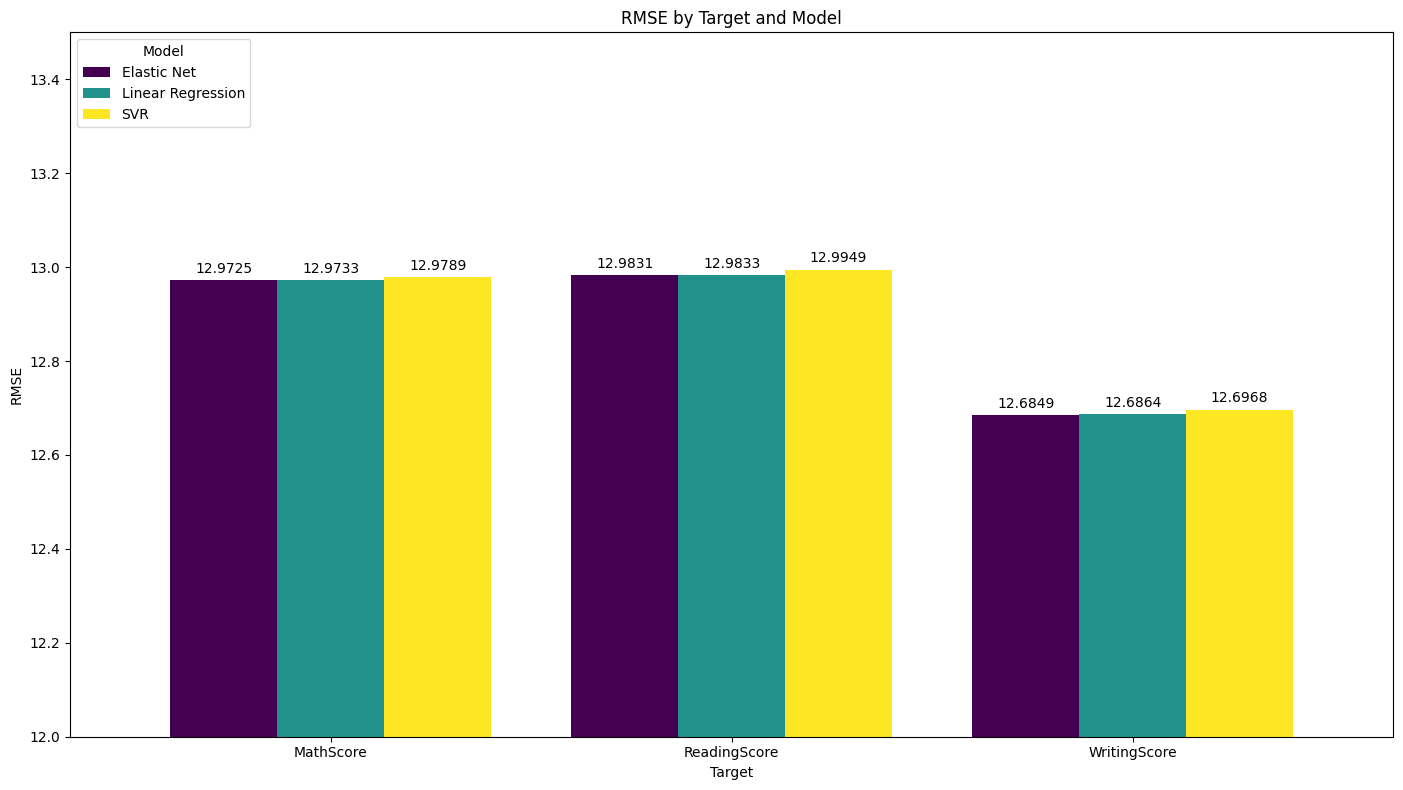

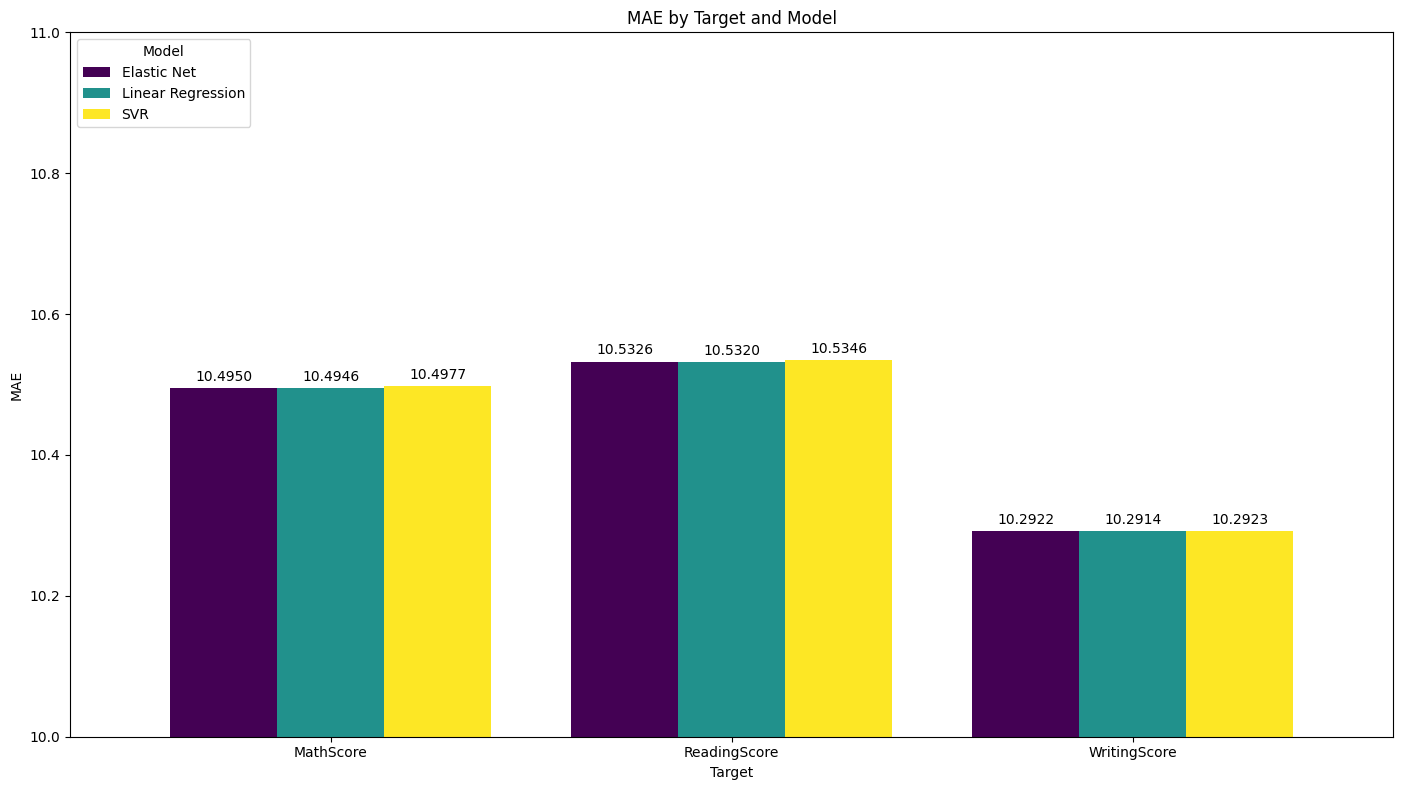

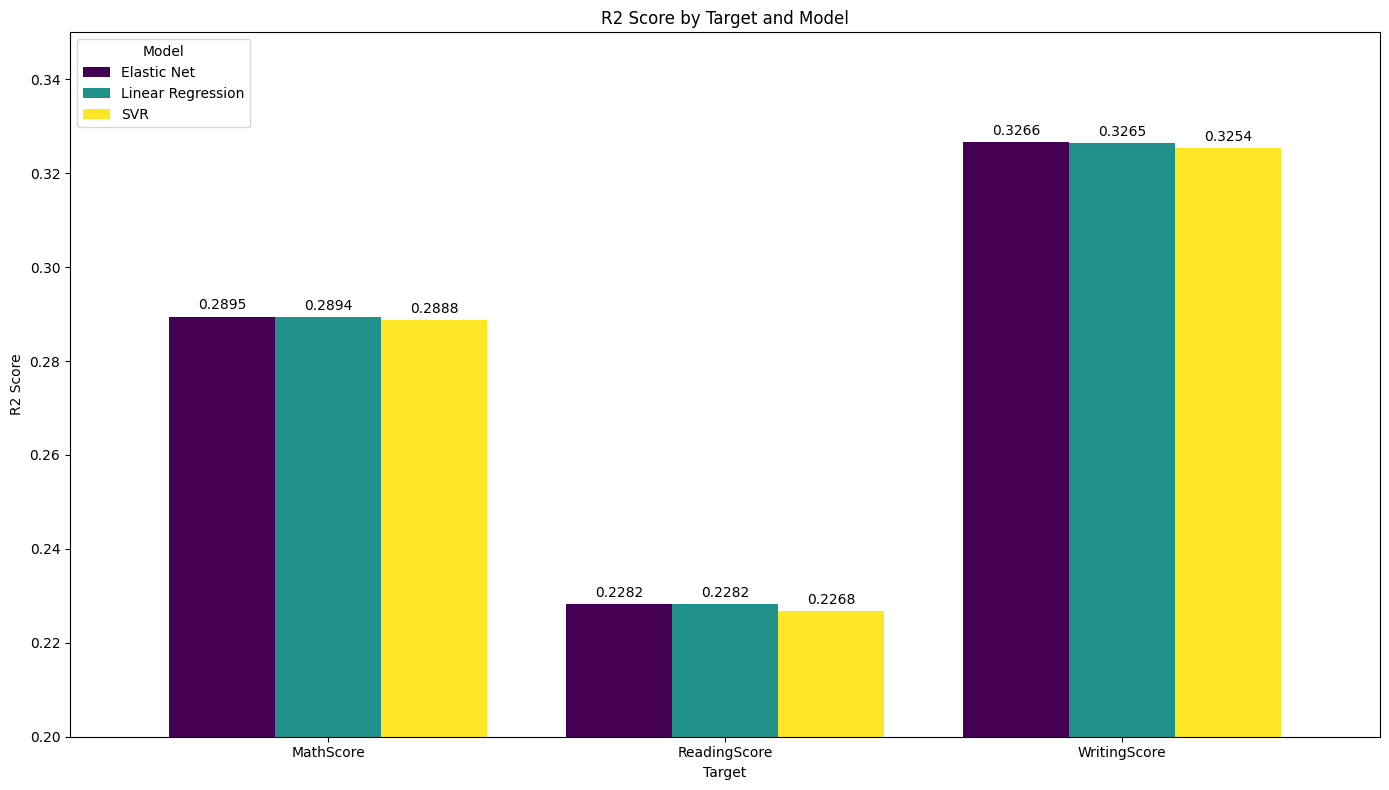

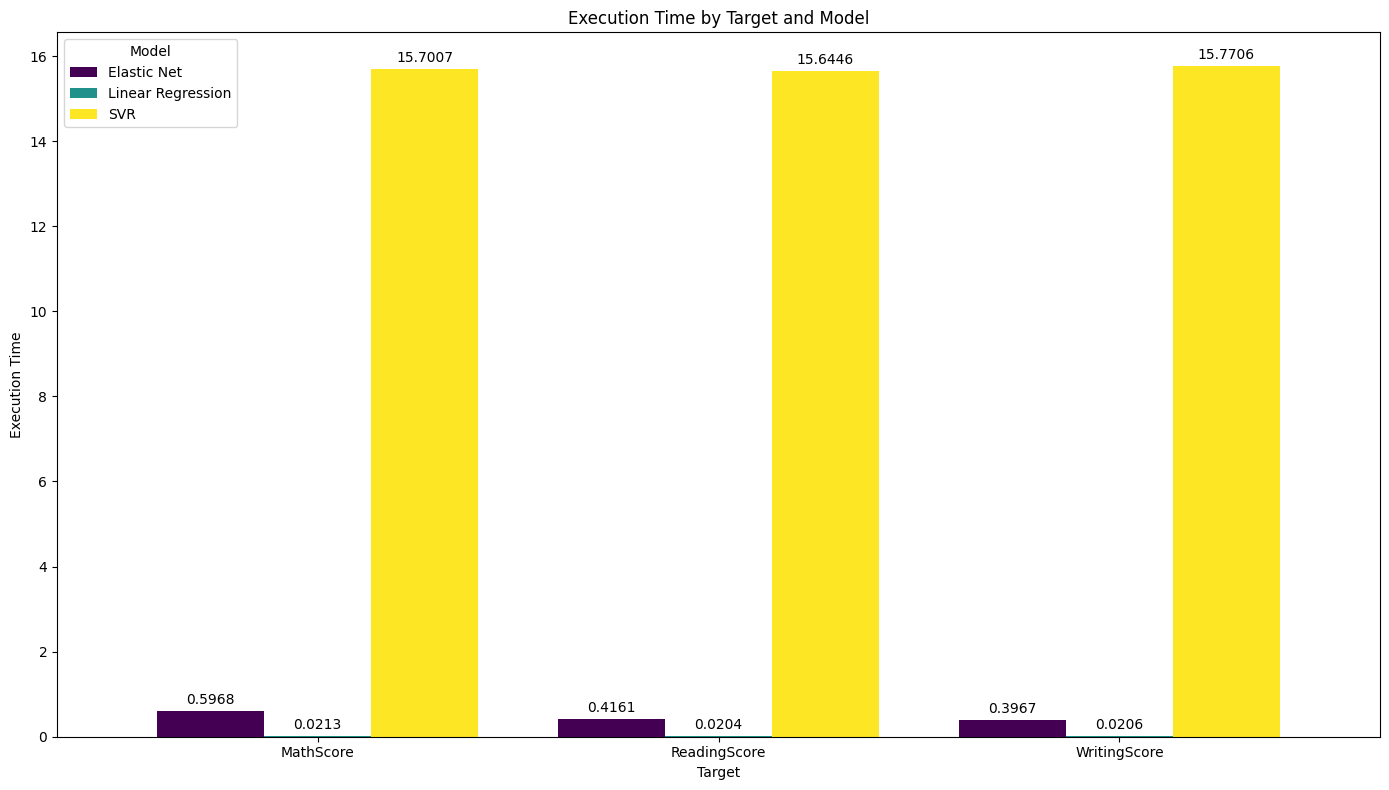

In [ ]:
# Create subplots for each evaluation metric and execution time
metrics = ["RMSE", "MAE", "R2 Score", "Execution Time"]

# Common legend position for all subplots
legend_bbox = (1, 1)

for metric in metrics:
    plt.figure(figsize=(14, 8))

    # Group the data by Target and Model for the current metric
    grouped = evaluation_df.groupby(["Target", "Model"])[metric].mean().unstack()

    # Create a bar plot with spacing between bars
    ax = grouped.plot(kind="bar", ax=plt.gca(), colormap="viridis", width=0.8)  # Adjust the width as needed

    plt.title(f"{metric} by Target and Model")
    plt.ylabel(metric)
    plt.xticks(rotation=0)  # Rotate labels by 90 degrees
    plt.tight_layout()

    # Set the legend position
    plt.legend(title="Model", loc="upper left")

    if metric == "RMSE":
        plt.ylim(12, 13.5)  # Set y-axis limits for RMSE
    elif metric == "MAE":
        plt.ylim(10, 11)  # Set y-axis limits for MAE
    elif metric == "R2 Score":
        plt.ylim(0.2, 0.35)  # Set y-axis limits for R2 Score

    # Display values inside the bars with four decimal places
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f"{height:.4f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

    plt.show()


Based on the provided metrics, both the Elastic Net and Linear Regression models seem to perform similarly well in terms of RMSE, MAE, and R2 Score. On the other hand, the SVR model has slightly worse RMSE, MAE, and R2 Score, and its execution time is significantly higher compared to the other models.

# **Create Prediction Model**

In [ ]:
# Initialize Linear Regression models for each target
linear_math_model = LinearRegression()
linear_read_model = LinearRegression()
linear_write_model = LinearRegression()

# Initialize ElasticNet models for each target
elastic_math_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_read_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_write_model = ElasticNet(alpha=0.001, l1_ratio=0.5)

# Fit the models using the training data
linear_math_model.fit(X_train, y1_train)
linear_read_model.fit(X_train, y2_train)
linear_write_model.fit(X_train, y3_train)

elastic_math_model.fit(X_train, y1_train)
elastic_read_model.fit(X_train, y2_train)
elastic_write_model.fit(X_train, y3_train)

ElasticNet(alpha=0.001)

# **Testing New Data**

In [ ]:
data_baru = {'Gender': ['female'],
            'EthnicGroup': ['group E'],
            'ParentEduc': ['masters degree'],
            'LunchType': ['standard'],
            'TestPrep': ['none'],
            'ParentMaritalStatus': ['single'],
            'PracticeSport': ['sometimes'],
            'IsFirstChild': ['yes'],
            'NrSiblings': [0],
            'TransportMeans': ['school_bus'],
            'WklyStudyHours': ['Between 5-10 hours']}

tmp=pd.DataFrame.from_dict(data_baru,orient='index').transpose()

# Fixing the values in the column
tmp['Gender'] = tmp['Gender'].map(gender_mapping)
tmp['LunchType'] = tmp['LunchType'].map(lunch_mapping)
tmp['WklyStudyHours'] = tmp['WklyStudyHours'].map(study_mapping)
tmp['IsFirstChild'] = tmp['IsFirstChild'].map(value_mapping)
tmp['TestPrep'] = tmp['TestPrep'].map(test_mapping)
tmp['TransportMeans'] = tmp['TransportMeans'].map(bus_mapping)

#One Hot Encoding
categorical_cols = ['EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'PracticeSport', 'WklyStudyHours']
for col in categorical_cols:
    tmp = pd.get_dummies(tmp, columns=[col], prefix = [col], drop_first=False)

#add missing column
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0

tmp = tmp[one_hot_columns]
tmp
scaled_tmp = pd.DataFrame(scaler.transform(tmp))
scaled_tmp.columns = tmp.columns.values
scaled_tmp.index = tmp.index.values

print("Prediksi Menggunakan Linear Reggression:")
math_linear_pred = linear_math_model.predict(scaled_tmp)
print("math_linear_pred :",math_linear_pred)
read_linear_pred = linear_read_model.predict(scaled_tmp)
print("read_linear_pred :",read_linear_pred)
write_linear_pred = linear_write_model.predict(scaled_tmp)
print("write_linear_pred :",write_linear_pred)
print()
print("Prediksi Menggunakan Elastic Net Reggression:")
math_elastic_pred = elastic_math_model.predict(scaled_tmp)
print("math_elastic_pred :",math_elastic_pred)
read_elastic_pred = elastic_read_model.predict(scaled_tmp)
print("read_elastic_pred :",read_elastic_pred)
write_elastic_pred = elastic_write_model.predict(scaled_tmp)
print("write_elastic_pred :",write_elastic_pred)

Prediksi Menggunakan Linear Reggression:
math_linear_pred : [2.62143096e+14]
read_linear_pred : [9.43880323e+13]
write_linear_pred : [7.53506501e+13]

Prediksi Menggunakan Elastic Net Reggression:
math_elastic_pred : [81.57813431]
read_elastic_pred : [85.10759368]
write_elastic_pred : [85.06790803]


# **Saving Models into Pickle**

In [ ]:
# Save the Elastic Net models using pickle
with open('elastic_math_model.pkl', 'wb') as f:
    pickle.dump(elastic_math_model, f)

with open('elastic_read_model.pkl', 'wb') as f:
    pickle.dump(elastic_read_model, f)

with open('elastic_write_model.pkl', 'wb') as f:
    pickle.dump(elastic_write_model, f)